# Pandas

<img src="https://raw.githubusercontent.com/LisonEvf/practicalAI-cn/master/images/logo.png" width=150>

在本文中，我们将学习使用Python Pandas库进行数据分析的基础知识。

<img src="https://raw.githubusercontent.com/LisonEvf/practicalAI-cn/master/images/pandas.png" width=500>




# 下载数据

首先，我们要获得一些数据。我们将从下面的公共链接中下载titanic数据集。

In [1]:
import urllib # urllib库中的 request 模块，用来处理网络请求，专门用来下载网页、文件

In [2]:
# 将数据从GitHub下载到笔记本电脑的本地磁盘
url = "https://raw.githubusercontent.com/LisonEvf/practicalAI-cn/master/data/titanic.csv"
response = urllib.request.urlopen(url) # 使用 urllib.request.urlopen()向这个网页发起请求
html = response.read()
with open('titanic.csv', 'wb') as f: # 'wb'表示二进制写入模式  表示当前目录下创建一个csv，将下载的内容写入到这里titanic.csv
    f.write(html)

In [3]:
# 检查数据是否已下载成功
!ls -l

total 88
drwxr-xr-x 1 root root  4096 Jul  1 21:04 sample_data
-rw-r--r-- 1 root root 85153 Jul  4 02:46 titanic.csv


# 加载数据

现在我们有一些数据可以使用，让我们加载到Pandas数据帧（dataframe）中。Pandas是一个很棒的python数据库分析库。

In [4]:
import pandas as pd

In [5]:
# 从CSV读取到Pandas DataFrame
df = pd.read_csv("titanic.csv", header=0) # 标注header在第几行

In [6]:
# 默认获取前五项  意思就是看表头几行的意思
df.head()
# df.head(10)

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,1
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,1
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,0


他们有不同的特征:
* pclass: class of travel
* name: full name of the passenger
* sex: gender
* age: numerical age
* sibsp: # of siblings/spouse aboard
* parch: number of parents/child aboard
* ticket: ticket number
* fare: cost of the ticket
* cabin: location of room
* emarked: port that the passenger embarked at (C - Cherbourg, S - Southampton, Q = Queenstown)
* survived: survial metric (0 - died, 1 - survived)

# 探索性分析

我们将使用Pandas库，看看如何探索和处理我们的数据。

In [7]:
# 描述性统计
df.describe()
# 计数（多少个数值） 均值 标准差（数值波动大小） 最小值 四分数（25% 50% 75%） 最大值

,pclass,age,sibsp,parch,fare,survived
count,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,1309.000000
mean,2.294882,29.881135,0.498854,0.385027,33.295479,0.381971
std,0.837836,14.413500,1.041658,0.865560,51.758668,0.486055
min,1.000000,0.166700,0.000000,0.000000,0.000000,0.000000
25%,2.000000,21.000000,0.000000,0.000000,7.895800,0.000000
50%,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,3.000000,39.000000,1.000000,0.000000,31.275000,1.000000
max,3.000000,80.000000,8.000000,9.000000,512.329200,1.000000


<Axes: >

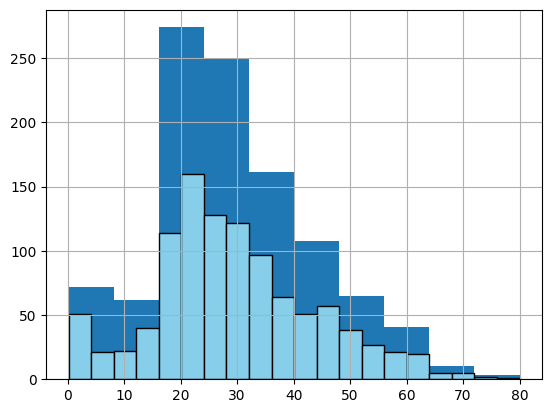

In [8]:
# 直方图
df["age"].hist() # age列直方图
df["age"].hist(bins=20, color='skyblue', edgecolor='black')

<Axes: xlabel='age'>

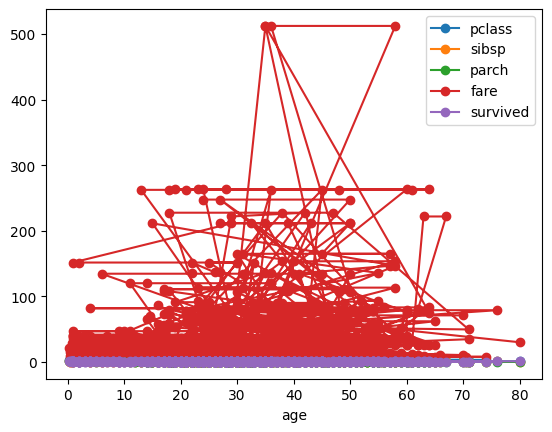

In [9]:
df.plot(x='age',kind='line', marker='o') # 折线图  只是介绍用法 图例很没用

In [10]:
df.plot(kind='bar') # 柱状图
df.plot(kind='scatter')  # 散点图
#  折线趋势看变化，柱状对比谁更大，散点专看相关性

Error in callback <function flush_figures at 0x7a727561d8a0> (for post_execute):


KeyboardInterrupt: 

In [11]:
# 唯一值
df["embarked"].unique()  # 查看某一列中唯一不重复的值 这里是特指embarked列

array(['S', 'C', nan, 'Q'], dtype=object)

In [12]:
# 根据特征选择数据
df["name"].head(10)

,name
0,"Allen, Miss. Elisabeth Walton"
1,"Allison, Master. Hudson Trevor"
2,"Allison, Miss. Helen Loraine"
3,"Allison, Mr. Hudson Joshua Creighton"
4,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)"
5,"Anderson, Mr. Harry"
6,"Andrews, Miss. Kornelia Theodosia"
7,"Andrews, Mr. Thomas Jr"
8,"Appleton, Mrs. Edward Dale (Charlotte Lamson)"
9,"Artagaveytia, Mr. Ramon"


In [13]:
# 筛选
df[df["sex"]=="female"].head() # 只有女性数据出现

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,24160,211.3375,B5,S,1
2,1,"Allison, Miss. Helen Loraine",female,2.0,1,2,113781,151.5500,C22 C26,S,0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1,2,113781,151.5500,C22 C26,S,0
6,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S,1
8,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0,2,0,11769,51.4792,C101,S,1


In [14]:
# 排序
df.sort_values("age", ascending=False).head(10) # ascending=False 表示降序排列

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
14,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S,1
61,1,"Cavendish, Mrs. Tyrell William (Julia Florence...",female,76.0,1,0,19877,78.8500,C46,S,1
1235,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S,0
135,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C,0
9,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C,0
727,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q,0
81,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S,0
506,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S,0
285,1,"Straus, Mr. Isidor",male,67.0,1,0,PC 17483,221.7792,C55 C57,S,0
594,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S,0


In [19]:
# Grouping（数据聚合与分组运算）
sex_group = df.groupby("survived") # 按照survived这一列的值把数据分组。 而是创建一个“分组对象”（GroupBy对象）
sex_group.mean(numeric_only=True) #  对每个分组求所有数值列的平均值  设置 numeric_only=True，pandas 会自动只选数值列

,pclass,age,sibsp,parch,fare
survived,,,,,
0,2.500618,30.545369,0.521632,0.328801,23.353831
1,1.962000,28.918228,0.462000,0.476000,49.361184


In [18]:
# iloc根据位置的索引来访问
df.iloc[0, :] # iloc在索引中的特定位置获取行（或列）（因此它只需要整数） 行 列

,0
pclass,1
name,"Allen, Miss. Elisabeth Walton"
sex,female
age,29.0
sibsp,0
parch,0
ticket,24160
fare,211.3375
cabin,B5
embarked,S


In [ ]:
# 获取指定位置的数据
df.iloc[0, 1]


'Allen, Miss. Elisabeth Walton'

In [ ]:
# loc根据标签的索引来访问
df.loc[0] # loc从索引中获取具有特定标签的行（或列）

pclass                                  1
name        Allen, Miss. Elisabeth Walton
sex                                female
age                                    29
sibsp                                   0
parch                                   0
ticket                              24160
fare                              211.338
cabin                                  B5
embarked                                S
survived                                1
Name: 0, dtype: object

# 预处理

In [ ]:
# 具有至少一个NaN值的行
df[pd.isnull(df).any(axis=1)].head() # axis=1 表示“按行检查”。 最终返回的是一个布尔的series，将其作为索引输出

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
9,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C,0
13,1,"Barber, Miss. Ellen ""Nellie""",female,26.0,0,0,19877,78.8500,NaN,S,1
15,1,"Baumann, Mr. John D",male,NaN,0,0,PC 17318,25.9250,NaN,S,0
23,1,"Bidois, Miss. Rosalie",female,42.0,0,0,PC 17757,227.5250,NaN,C,1
25,1,"Birnbaum, Mr. Jakob",male,25.0,0,0,13905,26.0000,NaN,C,0


In [ ]:
# 删除具有Nan值的行
df = df.dropna() # 删除具有NaN值的行
df = df.reset_index() # 重置行索引
df.head()

,index,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
0,0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,1
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,1
2,2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,0
3,3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,0
4,4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,0


In [ ]:
# 删除多行
df = df.drop(["name", "cabin", "ticket"], axis=1) # we won't use text features for our initial basic models  if it is a deletion opearation/row,then use axis=0
df.head()

,index,pclass,sex,age,sibsp,parch,fare,embarked,survived
0,0,1,female,29.0000,0,0,211.3375,S,1
1,1,1,male,0.9167,1,2,151.5500,S,1
2,2,1,female,2.0000,1,2,151.5500,S,0
3,3,1,male,30.0000,1,2,151.5500,S,0
4,4,1,female,25.0000,1,2,151.5500,S,0


In [ ]:
# 映射特征值 把字符串类别特征 转换成 数字特征，方便后续建模、计算
df['sex'] = df['sex'].map( {'female': 0, 'male': 1} ).astype(int)
df["embarked"] = df['embarked'].dropna().map( {'S':0, 'C':1, 'Q':2} ).astype(int) # dropna()：先去掉缺失值（避免报错）
df.head()

,index,pclass,sex,age,sibsp,parch,fare,embarked,survived
0,0,1,0,29.0000,0,0,211.3375,0,1
1,1,1,1,0.9167,1,2,151.5500,0,1
2,2,1,0,2.0000,1,2,151.5500,0,0
3,3,1,1,30.0000,1,2,151.5500,0,0
4,4,1,0,25.0000,1,2,151.5500,0,0


# 特征工程

In [ ]:
# lambda表达式创建新特征
def get_family_size(sibsp, parch):
    family_size = sibsp + parch
    return family_size  # 兄弟姐妹配偶加父母子女总数

df["family_size"] = df[["sibsp", "parch"]].apply(lambda x: get_family_size(x["sibsp"], x["parch"]), axis=1)
# df[["sibsp", "parch"]] 取两列数据；
# apply(..., axis=1) 表示对每一行调用后面的函数；
# lambda x: ... 是匿名函数，x 是每一行的 Series
df.head()

,index,pclass,sex,age,sibsp,parch,fare,embarked,survived,family_size
0,0,1,0,29.0000,0,0,211.3375,0,1,0
1,1,1,1,0.9167,1,2,151.5500,0,1,3
2,2,1,0,2.0000,1,2,151.5500,0,0,3
3,3,1,1,30.0000,1,2,151.5500,0,0,3
4,4,1,0,25.0000,1,2,151.5500,0,0,3


In [ ]:
# 重新组织标题
df = df[['pclass', 'sex', 'age', 'sibsp', 'parch', 'family_size', 'fare', 'embarked', 'survived']] #对标题重新命名
df.head()

,pclass,sex,age,sibsp,parch,family_size,fare,embarked,survived
0,1,0,29.0000,0,0,0,211.3375,0,1
1,1,1,0.9167,1,2,3,151.5500,0,1
2,1,0,2.0000,1,2,3,151.5500,0,0
3,1,1,30.0000,1,2,3,151.5500,0,0
4,1,0,25.0000,1,2,3,151.5500,0,0


# 保存数据

In [ ]:
# 保存数据帧（dataframe）到 CSV
df.to_csv("processed_titanic.csv", index=False)

In [ ]:
# 看你一下你保持的文件
!ls -l

total 96
-rw-r--r-- 1 root root  6975 Dec 16 12:46 processed_titanic.csv
drwxr-xr-x 1 root root  4096 Dec 10 17:34 sample_data
-rw-r--r-- 1 root root 85153 Dec 16 12:46 titanic.csv
